In [1]:
import tensorflow as tf

# List all available physical devices
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"TensorFlow is using GPU: {physical_devices}")
else:
    print("TensorFlow is not using a GPU.")


2025-03-25 10:56:29.308552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742896589.319415    1751 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742896589.322623    1751 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 10:56:29.333936: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [5]:
# Load from JSON file
with open(r"Data//species_universe.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")

Abelmoschus esculentus: 0
Abelmoschus manihot: 1
Abies alba: 2
Abies amabilis: 3
Abies balsamea: 4
Abies cephalonica: 5
Abies concolor: 6
Abies grandis: 7
Abies homolepis: 8
Abies koreana: 9
Abies lasiocarpa: 10
Abies nordmanniana: 11
Abies procera: 12
Abies sachalinensis: 13
Abies sibirica: 14
Abies veitchii: 15
Abutilon mollissimum: 16
Abutilon theophrasti: 17
Acacia baileyana: 18
Acacia dealbata: 19
Acacia harpophylla: 20
Acaena alpina: 21
Acaena anserinifolia: 22
Acaena argentea: 23
Acaena buchananii: 24
Acaena caesiiglauca: 25
Acaena glabra: 26
Acaena inermis: 27
Acaena juvenca: 28
Acaena magellanica: 29
Acaena novae-zelandiae: 30
Acanthocalyx nepalensis: 31
Acanthus mollis: 32
Acanthus sennii: 33
Acanthus spinosus: 34
Acer barbinerve: 35
Acer campestre: 36
Acer griseum: 37
Acer japonicum: 38
Acer monspessulanum: 39
Acer negundo: 40
Acer obtusatum: 41
Acer palmatum: 42
Acer pictum: 43
Acer platanoides: 44
Acer pseudoplatanus: 45
Acer rubrum: 46
Acer rufinerve: 47
Acer saccharinum:

In [6]:
with open("Data/Full_Scale/vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[0.5050869, 0.0, 0.0, 0.0, 0.7999878, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[0.709527, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[0.6718502, 0.0, 0.0, 0.0, 0.83332443, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[0.91899633, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[0.6059245, 0.5373939, 0.49581122, 0.4746435...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[0.61264133, 0.53604275, 0.47785866, 0.41814...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[0.6806042, 0.6014411, 0.50048757, 0.4638896...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[0.69237506, 0.60102916, 0.49402428, 0.45421...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [7]:
type(df.iloc[0].climatic_map),type(df.iloc[0].species_vector),type(df.iloc[0].species)
# df.iloc[0].climatic_map ya esta en float32
df.iloc[0].species_vector

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Making a Subset of 10000 samples

In [8]:
# Create bins for longitude and latitude
df["lat_bin"] = pd.cut(df["latitude"], bins=10, labels=False)
df["lon_bin"] = pd.cut(df["longitude"], bins=10, labels=False)

# Create a stratification column combining both bins
df["geo_strata"] = df["lat_bin"].astype(str) + "_" + df["lon_bin"].astype(str)

# Stratified sampling based on geographical bins
df_sampled, _ = train_test_split(df, train_size=10000, stratify=df["geo_strata"], random_state=42)

# Drop auxiliary columns
df_sampled = df_sampled.drop(columns=["lat_bin", "lon_bin", "geo_strata"])

print(df_sampled.shape)

(10000, 7)


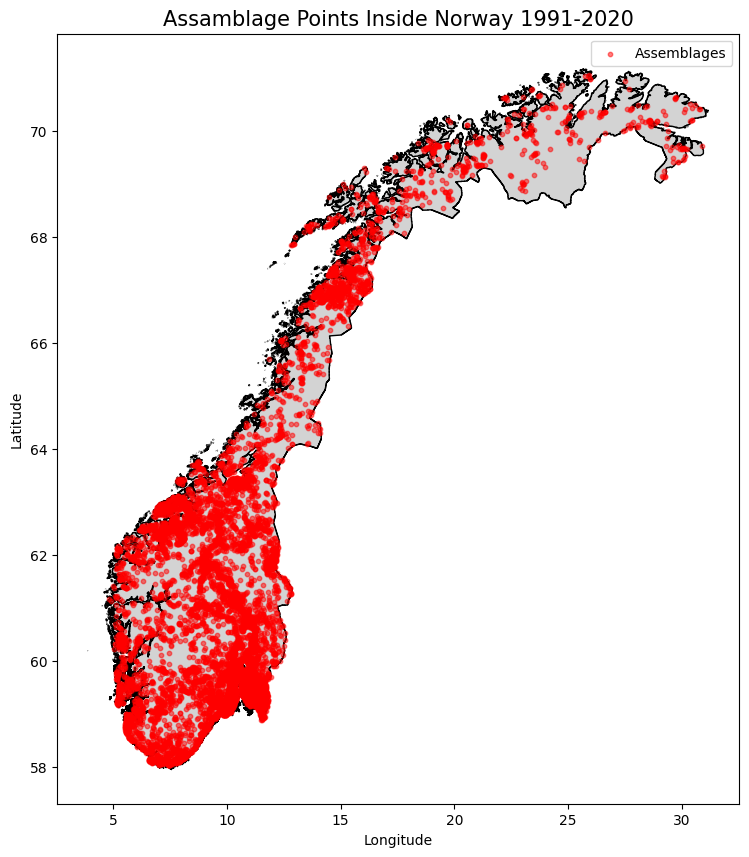

In [9]:
def plot_sample_points(df):
    # Load the shapefile of Norway's boundaries (assuming you have this shapefile)
    norway = gpd.read_file("Norway_shapefile/gadm41_NOR_0.shp").to_crs(epsg=4326)  # Make sure it's in EPSG:4326 for plotting
    
    # Step 2: Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the Norway boundary
    norway.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Assuming 'result' DataFrame has columns 'longitude' and 'latitude' (from the grid centroids)
    result_geo_df = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  # Ensure the correct CRS
    )
    
    # Plot the filtered points inside Norway
    result_geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5, label="Assemblages")
    
    # Customize plot
    ax.set_title("Assamblage Points Inside Norway 1991-2020", fontsize=15)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    
    # Show the plot
    plt.show()

plot_sample_points(df_sampled)

### Train, val and test splits

In [10]:
# train_df, temp_df = train_test_split(df_sampled, test_size=0.3, random_state=42, shuffle = True)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, shuffle = True)

# Now, split the temporary data into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle = True)

### Tensorflow dataset

In [11]:
import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
# Assuming `df` is your pandas DataFrame containing 'climatic_map' and 'species_vector'
# df = ...  # Your DataFrame

def create_tf_dataset(df, batch_size=32):
    # Convert 'climatic_map' and 'species_vector' columns to numpy arrays
    climatic_maps = np.stack(df['climatic_map'].values).astype(np.float32)  # Shape: (N, H, W, C)
    species_vectors = np.stack(df['species_vector'].values).astype(np.float32)  # Shape: (N, num_species)
    
    # Create a tf.data.Dataset from the numpy arrays
    dataset = tf.data.Dataset.from_tensor_slices((climatic_maps, species_vectors))
    
    # Shuffle, batch, and repeat (for training)
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset

train_dataset = create_tf_dataset(train_df, batch_size=32)
val_dataset = create_tf_dataset(val_df, batch_size=32)
test_dataset = create_tf_dataset(test_df, batch_size=32)
# Iterate through the dataset
for data, label in train_dataset:
    print(data.shape)  # Shape: (batch_size, H, W, C)
    print(label)  # Shape: (batch_size, num_species)


I0000 00:00:1742896610.915050    1751 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1742896610.919002    1751 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 5357), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 5357), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 5357), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 5357), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0.

2025-03-25 10:56:54.332341: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(32, 32, 11)
Averaged image shape: (32, 32)


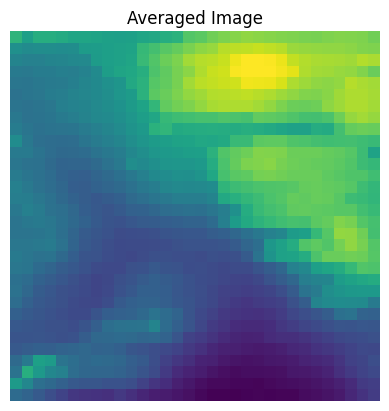

2025-03-25 10:56:54.886217: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
for images, labels in train_dataset.take(1):  # Take the first batch
    image = images[0].numpy()  # Get the first image from the batch and convert to numpy
    print(image.shape)
    # Average across the channels (assuming image shape is (H, W, 11))
    image_avg = image.mean(axis=-1)  # Average along the last axis (channels)

    # Check the shape of the averaged image (should be H, W)
    print("Averaged image shape:", image_avg.shape)

    # Plot the averaged image
    plt.imshow(image_avg, cmap='viridis')  # You can change the colormap if needed
    plt.title("Averaged Image")
    plt.axis('off')
    plt.show()

In [13]:
image.shape

(32, 32, 11)

### Set seed

In [14]:
tf.keras.utils.set_random_seed(42)

In [15]:
class ClassBalancedFocalLoss(tf.keras.losses.Loss):
    def __init__(self, samples_per_class, beta=0.999, gamma=2.0, from_logits=False):
        """
        Class-Balanced Focal Loss
        :param samples_per_class: List or array with number of samples per class
        :param beta: Balancing hyperparameter (default 0.999)
        :param gamma: Focusing hyperparameter for Focal Loss (default 2.0)
        :param from_logits: Whether predictions are logits (default False)
        """
        super(ClassBalancedFocalLoss, self).__init__()
        self.beta = beta
        self.gamma = gamma
        self.from_logits = from_logits
        
        # Compute effective number of samples
        effective_num = 1.0 - tf.pow(beta, tf.convert_to_tensor(samples_per_class, dtype=tf.float32))
        class_weights = (1.0 - beta) / effective_num
        self.class_weights = class_weights / tf.reduce_sum(class_weights)  # Normalize weights

    def call(self, y_true, y_pred):
        """
        Compute the Class-Balanced Focal Loss
        :param y_true: One-hot encoded true labels (batch_size, num_classes)
        :param y_pred: Model predictions (batch_size, num_classes)
        :return: Loss value
        """
        if self.from_logits:
            y_pred = tf.nn.softmax(y_pred, axis=-1)  # Convert logits to probabilities
        
        # Compute cross-entropy loss
        ce_loss = -y_true * tf.math.log(y_pred + 1e-8)
        
        # Compute modulating factor (focal term)
        focal_weight = tf.pow(1.0 - y_pred, self.gamma)
        
        # Compute class-balanced weight
        class_weights = tf.expand_dims(self.class_weights, axis=0)  # Shape (1, num_classes)
        cb_weight = class_weights * y_true  # Apply class-balanced weighting
        
        # Compute final loss
        loss = cb_weight * focal_weight * ce_loss
        return tf.reduce_sum(loss, axis=-1)  # Sum over classes



In [16]:
num_classes = len(df.iloc[0].species_vector)
samples_per_class = df.species_vector.sum(axis=0)  # Example class frequencies
CBFL = ClassBalancedFocalLoss(samples_per_class)

num_classes,samples_per_class

(5357, array([   4, 2309,    1, ...,   20,    1,    1], dtype=int32))

In [17]:
import tensorflow as tf
import numpy as np

class CustomLoss(tf.keras.losses.Loss):
    def __init__(self, loss_fn, args, weighted=False):
        super().__init__()
        self.loss_fn = loss_fn
        self.weighted = weighted
        self.args = args
        if self.weighted:
            self.samples_per_cls = args['train_label_cnt']
            self.no_of_classes = args['num_classes']

    def compute_weights(self, labels, beta=0.9999):
        # Effective number of samples per class
        effective_num = 1.0 - np.power(beta, self.samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        weights = weights / weights.sum() * self.no_of_classes
        
        # Convert to TensorFlow tensor and apply for each batch
        weights = tf.convert_to_tensor(weights, dtype=tf.float32)
        weights = tf.expand_dims(weights, axis=0)
        # Use `tf.shape(labels)[0]` instead of `labels.shape[0]`
        batch_size = tf.shape(labels)[0]
        weights = tf.repeat(weights, batch_size, axis=0) * labels

        return weights

    def forward_focal(self, logits, labels, alpha=0.999, gamma=2.0):
        # Sigmoid activation to get probabilities from logits
        p = tf.sigmoid(logits)
        
        # Binary cross-entropy loss (without reduction)
        ce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
        
        # Compute p_t for focal loss
        p_t = p * labels + (1 - p) * (1 - labels)
        focal_loss = ce_loss * tf.pow(1.0 - p_t, gamma)

        if self.weighted:
            # Compute class weights
            weights = self.compute_weights(labels)
            weights_t = weights * labels * alpha + (1 - labels) * (1 - alpha)
            weighted_loss = weights_t * focal_loss
            return tf.reduce_mean(weighted_loss)
        else:
            # Focal loss without class balancing
            alpha_t = alpha * labels + (1 - alpha) * (1 - labels)
            focal_loss = alpha_t * focal_loss
            return tf.reduce_mean(focal_loss)
    
    def forward_bce(self, logits, labels):
        if self.weighted:
            # Use class weights for BCE loss
            weights = self.compute_weights(labels)
            bce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
            return tf.reduce_mean(bce_loss * weights)
        else:
            # Simple binary cross-entropy loss
            return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))
    
    def forward_dice(self, logits, labels):
        p = tf.sigmoid(logits)
        smooth = 1.0
        intersection = tf.reduce_sum(p * labels, axis=0)
        total = tf.reduce_sum(tf.square(p) + tf.square(labels), axis=0)
        dice_loss = 1 - (intersection + smooth) / (total + smooth)
        return tf.reduce_mean(dice_loss)

    def call(self, logits, labels):
        if self.loss_fn == 'bce':
            return self.forward_bce(logits, labels)
        elif self.loss_fn == 'focal':
            return self.forward_focal(logits, labels)
        elif self.loss_fn == 'dice':
            return self.forward_dice(logits, labels)



In [18]:
# Define arguments (as an example)
args = {
    'train_label_cnt': samples_per_class ,  # Example counts per class
    'num_classes': num_classes  # Example number of classes
}

# Instantiate the custom loss function (using Focal Loss as an example)
custom_loss = CustomLoss(loss_fn='focal', args=args, weighted=True)

# Define example logits and labels
logits = tf.random.normal([32, num_classes])  # Batch of 32 with 3 classes
labels = tf.one_hot(tf.random.uniform([32], maxval=num_classes, dtype=tf.int32), depth=num_classes)

# Calculate the loss
loss = custom_loss(logits, labels)
print("Loss:", loss.numpy())


Loss: 0.00038970995


In [19]:
# Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0) errors
        loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss
    
def focal_loss_testing(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Clip y_pred to avoid log(0) errors
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        
        # Compute the focal loss
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.mean(K.sum(loss, axis=-1))
    return loss

# Focal Loss for Multi-Label Binary Classification
def focal_loss_2(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Clip the predicted values to avoid log(0) errors
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Calculate the focal loss
        cross_entropy = -y_true * K.log(y_pred)  # Binary cross entropy component
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy  # Apply focal weight
        
        return K.mean(K.sum(loss, axis=-1))  # Sum across the classes and average the loss

    return loss

### Model 0

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K


# Assuming the datasets are already created as:
# train_dataset, val_dataset, test_dataset

# Define a simple CNN model
def create_cnn_model(input_shape=image.shape):
    model = tf.keras.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the output of the last convolutional block
        tf.keras.layers.Flatten(),
        
        # Dense Layer
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output Layer (Assuming binary classification, change for multiclass)
        tf.keras.layers.Dense(num_classes, activation='sigmoid')  # Change activation if multiclass
    ])
    
    return model

# Create the model
model_0 = create_cnn_model(input_shape=image.shape)
custom_loss = CustomLoss(loss_fn='focal', args=args, weighted=True)

# Compile the model
model_0.compile(optimizer='adam', # adamw
              loss=focal_loss(alpha=0.25, gamma=4.0),#CBFL, custom_loss
              # loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model_0.summary()







/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5357)           │       691,053 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,007,789 (3.84 MB)

 Trainable params: 1,007,789 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history_0 = model_0.fit(
    train_dataset,  # The training dataset
    validation_data=val_dataset,  # The validation dataset
    epochs=20,  # You can adjust the number of epochs
    verbose=1
)


Epoch 1/20


I0000 00:00:1742896616.510682    1841 service.cc:148] XLA service 0x7f5e3c005440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742896616.510711    1841 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-03-25 10:56:56.527721: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742896616.611509    1841 cuda_dnn.cc:529] Loaded cuDNN version 90300


  99/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0035 - loss: 0.0084

I0000 00:00:1742896618.680231    1841 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1293/1293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0040 - loss: 0.0017

2025-03-25 10:57:04.294800: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87_0', 16 bytes spill stores, 16 bytes spill loads



1293/1293 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0040 - loss: 0.0017 - val_accuracy: 0.0011 - val_loss: 6.4332e-04
Epoch 2/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0044 - loss: 6.3245e-04 - val_accuracy: 0.0044 - val_loss: 6.1298e-04
Epoch 3/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0048 - loss: 6.0812e-04 - val_accuracy: 0.0050 - val_loss: 5.9684e-04
Epoch 4/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0052 - loss: 5.9133e-04 - val_accuracy: 0.0067 - val_loss: 5.8885e-04
Epoch 5/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0059 - loss: 5.8103e-04 - val_accuracy: 0.0087 - val_loss: 5.8293e-04
Epoch 6/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0073 - loss: 5.7017e-04 - val_accuracy: 0.0080 - val_loss: 5.8155e-04
Epoch 7/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0083 - loss: 5.6059e-04 - val_accuracy: 0.0111 - val_loss: 5.7301e-04
Epoch 8/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [22]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_0.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

247/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0219 - loss: 6.0145e-04

2025-03-25 10:57:52.682604: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87_0', 16 bytes spill stores, 16 bytes spill loads



277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0219 - loss: 6.0022e-04
Test Loss: 0.0005885263090021908
Test Accuracy: 0.02143985591828823


In [23]:
def plot_acc_loss(history):
    # Optionally, plot the training history (e.g., loss and accuracy)
    # Plot Training & Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot Training & Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

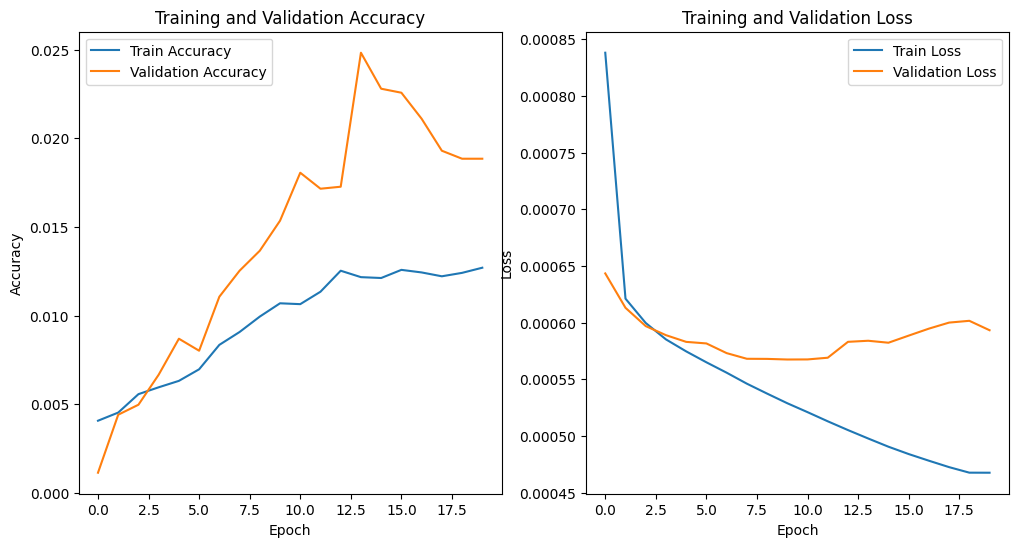

In [24]:
plot_acc_loss(history_0)

### Model 1

In [25]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Precision metric
def custom_precision(y_true, y_pred):
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)

    # Only consider the presence (y_true = 1)
    true_positive = K.sum(y_true * y_pred)  # Correct positive predictions (True positives)
    predicted_positive = K.sum(y_pred)  # Total number of predicted positives (including false positives)
    
    # Precision = TP / (TP + FP), where FP is considered the predicted positives
    precision = true_positive / (predicted_positive + K.epsilon())  # Add epsilon to avoid division by zero
    
    return precision

# Recall metric
def custom_recall(y_true, y_pred):
    # Clip predictions to avoid log(0) and ensure valid probabilities (between 0 and 1)
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # True positives (TP): y_true = 1 and y_pred = 1
    true_positives = K.sum(y_true * y_pred)
    
    # Possible positives: All actual positives in the ground truth (y_true = 1)
    possible_positives = K.sum(y_true)
    
    # Recall = TP / (TP + FN) where FN = possible_positives - TP
    recall = true_positives / (possible_positives + K.epsilon())  # Add epsilon to avoid division by zero
    
    return recall

# Top-K Accuracy (Hit Rate)
def custom_top_k_accuracy(k=10):
    def top_k_accuracy(y_true, y_pred):
        return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=k)
    return top_k_accuracy


def weighted_binary_accuracy(y_true, y_pred, weight_positive=2.0, weight_negative=1.0):
    # Clip predictions to avoid log(0) issues and ensure valid probabilities
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Binary accuracy: counts how many predictions are correct
    correct_prediction = K.equal(K.round(y_true), K.round(y_pred))
    # Cast the boolean tensor to float32 to allow mathematical operations
    correct_prediction = K.cast(correct_prediction, dtype=tf.float32)

    
    # Weights for presence (1) and absence (0)
    weighted_accuracy = correct_prediction * (y_true * weight_positive + (1 - y_true) * weight_negative)
    
    # Return the average weighted accuracy
    return K.mean(weighted_accuracy)


In [94]:
import keras

def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the output of the last convolutional block
        tf.keras.layers.Flatten(),

        # Fully Connected Layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        # Output Layer (Assuming binary classification)
        tf.keras.layers.Dense(num_classes, activation='sigmoid')  
    ])
    
    return model
# Create the model
model_1 = create_cnn_model(input_shape=image.shape)
custom_loss = CustomLoss(loss_fn='focal', args=args, weighted=True)
binary_accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.1)
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=(0, 1), threshold=0.1, name='binary_iou')
# Compile the model
model_1.compile(optimizer=keras.optimizers.AdamW(learning_rate=1e-3), # adamw
              loss=focal_loss(alpha=0.25, gamma=4.0),#CBFL, custom_loss
              # loss='binary_crossentropy', 
              metrics=[
                  custom_precision,
                  custom_recall,
                  custom_top_k_accuracy(k=20),
                  binary_iou,
                  binary_accuracy,
              ])

# Print the model summary
model_1.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 64)     │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 5357)           │       691,053 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,161,261 (8.24 MB)

 Trainable params: 2,160,365 (8.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [95]:

def plot_acc_loss_custom(history):
    # Optionally, plot the training history (e.g., loss and accuracy)
    # Plot Training & Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['top_k_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_top_k_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot Training & Validation Loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training & Validation Loss
    plt.subplot(1, 3, 3)
    plt.plot(history.history['binary_iou'], label='Train binary_iou')
    plt.plot(history.history['val_binary_iou'], label='Validation binary_iou')
    plt.title('Training and Validation binary_iou')
    plt.xlabel('Epoch')
    plt.ylabel('binary_iou')
    plt.legend()
    plt.show()

In [96]:
# Train the model
history_1 = model_1.fit(
    train_dataset,  # The training dataset
    validation_data=val_dataset,  # The validation dataset
    epochs=30,  # You can adjust the number of epochs
    verbose=2
)

Epoch 1/30
1293/1293 - 10s - 8ms/step - binary_accuracy: 0.6546 - binary_iou: 0.2831 - custom_precision: 0.0173 - custom_recall: 0.2984 - loss: 9.8507e-04 - top_k_accuracy: 0.1054 - val_binary_accuracy: 0.3075 - val_binary_iou: 0.2382 - val_custom_precision: 0.0135 - val_custom_recall: 0.3647 - val_loss: 9.1945e-04 - val_top_k_accuracy: 0.0785
Epoch 2/30
1293/1293 - 4s - 3ms/step - binary_accuracy: 0.6996 - binary_iou: 0.2836 - custom_precision: 0.0189 - custom_recall: 0.3043 - loss: 7.0740e-04 - top_k_accuracy: 0.1274 - val_binary_accuracy: 0.3832 - val_binary_iou: 0.2579 - val_custom_precision: 0.0140 - val_custom_recall: 0.3517 - val_loss: 7.9782e-04 - val_top_k_accuracy: 0.1589
Epoch 3/30
1293/1293 - 4s - 3ms/step - binary_accuracy: 0.6868 - binary_iou: 0.2837 - custom_precision: 0.0185 - custom_recall: 0.3063 - loss: 6.7598e-04 - top_k_accuracy: 0.1364 - val_binary_accuracy: 0.5799 - val_binary_iou: 0.2579 - val_custom_precision: 0.0162 - val_custom_recall: 0.3275 - val_loss: 6.52

In [97]:
# Evaluate the model on the test dataset
test_loss,test_custom_recall,test_custom_precision,test_custom_top_k_accuracy,test_binary_iou,test_binary_accuracy = model_1.evaluate(test_dataset)

test_custom_top_k_accuracy


277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7663 - binary_iou: 0.3708 - custom_precision: 0.0223 - custom_recall: 0.3365 - loss: 5.3813e-04 - top_k_accuracy: 0.2031


0.19498984515666962

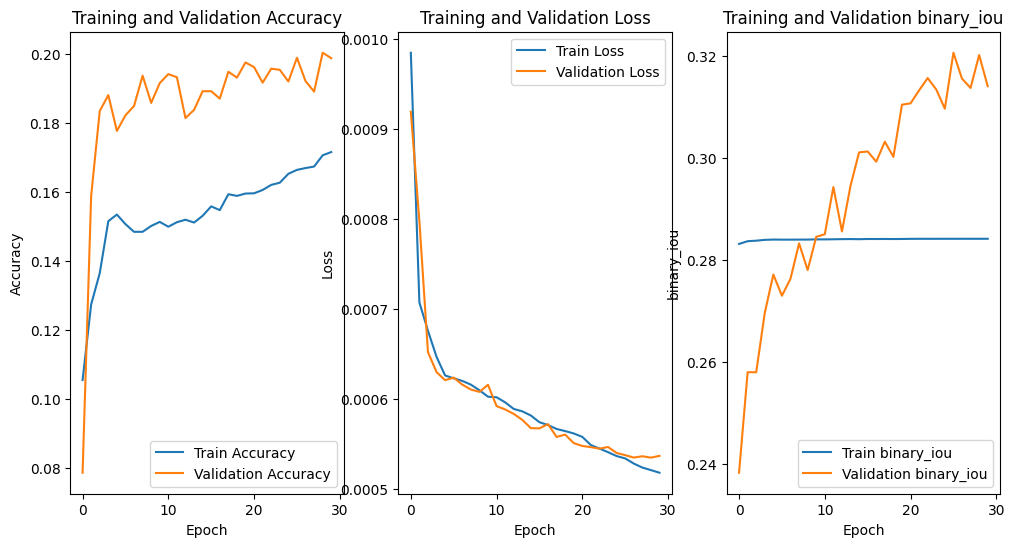

In [98]:
plot_acc_loss_custom(history_1)

### Model 2

In [74]:
def create_expanded_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Fourth Convolutional Block (New)
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Fifth Convolutional Block (New)
        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the output of the last convolutional block
        tf.keras.layers.Flatten(),

        # Fully Connected Layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        # Additional Dense Layer (New)
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output Layer (Assuming binary classification)
        tf.keras.layers.Dense(num_classes, activation='sigmoid')  # Change to 'softmax' for multi-class classification
    ])
    
    return model
model_2 = create_expanded_cnn_model(input_shape=image.shape,num_classes= num_classes)
custom_loss = CustomLoss(loss_fn='focal', args=args, weighted=True)
binary_accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.1)

# Compile the model
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), # adamw
              loss=focal_loss(alpha=0.25, gamma=4.0),#CBFL, custom_loss
              # loss='binary_crossentropy', 
              metrics=[
                  custom_precision,
                  custom_recall,
                  #custom_jaccard_index,
                  binary_accuracy,
                  weighted_binary_accuracy
              ])

# Print the model summary
model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 64)     │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 2, 2, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,983,682 (26.64 MB)

 Trainable params: 6,979,714 (26.63 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [75]:
# Train the model
history_2 = model_2.fit(
    train_dataset,  # The training dataset
    validation_data=val_dataset,  # The validation dataset
    epochs=30,  # You can adjust the number of epochs
    verbose=2
)

Epoch 1/30


ValueError: Dimensions must be equal, but are 5357 and 2 for '{{node compile_loss/loss/mul_1}} = Mul[T=DT_FLOAT](compile_loss/loss/mul, compile_loss/loss/Pow)' with input shapes: [?,5357], [?,2].

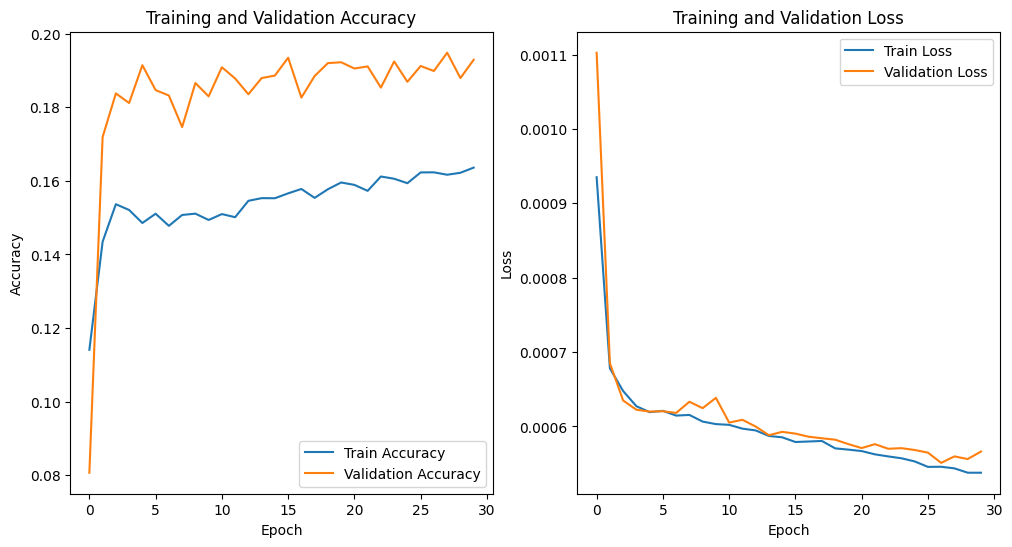

In [321]:
plot_acc_loss_custom(history_2)

### Predictions and Testing

In [317]:
test_image, test_label = next(iter(test_dataset.take(1)))
test_label,test_image


(<tf.Tensor: shape=(32, 5357), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(32, 32, 32, 11), dtype=float32, numpy=
 array([[[[4.27801788e-01, 9.02981520e-01, 8.67337584e-01, ...,
           9.07068253e-01, 5.07936478e-01, 5.27777791e-01],
          [4.91558373e-01, 8.34054708e-01, 7.99001098e-01, ...,
           8.95761490e-01, 4.97354478e-01, 4.61805552e-01],
          [6.14628375e-01, 7.16854334e-01, 6.81332707e-01, ...,
           8.85527611e-01, 4.76190448e-01, 3.42592597e-01],
          ...,
          [4.93168890e-01, 5.64196110e-01, 5.58429599e-01, ...,
           6.38739586e-01, 5.02645493e-01, 5.25462985e-01],
          [4.85948980e-01, 5.74021816e-01, 5.69380164e-01, ...,
           6.32735252e-01, 5.02645493e-01, 5.358

In [188]:
y_pred = model_1.predict(test_image)
y_true = test_label
y_true.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


TensorShape([32, 5357])

In [186]:
import tensorflow as tf

def custom_jaccard_index(y_true, y_pred, k=10):
    # Get the top k predicted indices (for the batch)
    top_k_indices = tf.argsort(y_pred, direction='DESCENDING', axis=-1)[:, :k]

    # Convert y_true to a flat vector and get the true positive indices
    #y_true_flat = tf.reshape(y_true, [-1])
    true_positives = tf.where(y_true != 0)  # Non-zero elements
    #true_positives = tf.reshape(true_positives, [-1])  # Flatten it to 1D

    # Debugging: Check the shapes
    #tf.print("y_true_flat shape:", y_true_flat.shape)
    tf.print("true_positives shape:", true_positives.shape)
    tf.print("top_k_indices shape:", top_k_indices.shape)

    # Ensure both tensors are of type int32 for set operations
    top_k_indices = tf.cast(top_k_indices, tf.int32)
    true_positives = tf.cast(true_positives, tf.int32)

    # Reshape true_positives to make it 2D
    true_positives = tf.expand_dims(true_positives, 0)

    # Calculate the intersection and union using TensorFlow set operations
    intersection = tf.size(tf.sets.intersection(top_k_indices, true_positives))
    union = tf.size(tf.sets.union(top_k_indices, true_positives))

    # Debugging: Check intersection and union sizes
    tf.print("intersection size:", intersection)
    tf.print("union size:", union)

    # Convert intersection and union to float32 for division
    intersection = tf.cast(intersection, tf.float32)
    union = tf.cast(union, tf.float32)

    # Compute the Jaccard Index: intersection / union
    jaccard_index = intersection / (union + tf.keras.backend.epsilon())

    return jaccard_index



In [187]:
custom_jaccard_index(y_true,y_pred)

true_positives shape: TensorShape([962, 2])
top_k_indices shape: TensorShape([32, 10])


2025-03-24 13:55:39.960879: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at set_kernels.cc:479 : INVALID_ARGUMENT: Mismatched shapes [32] vs [1,962]


InvalidArgumentError: {{function_node __wrapped__DenseToDenseSetOperation_device_/job:localhost/replica:0/task:0/device:CPU:0}} Mismatched shapes [32] vs [1,962] [Op:DenseToDenseSetOperation] name: 

In [53]:
# Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0) errors
        loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss

In [313]:
alpha=0.25
gamma=2.0

y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0) errors
loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred) - \
       (1 - y_true) * (1 - alpha) * K.pow(y_pred, gamma) * K.log(1 - y_pred)

y_pred, y_true, loss, K.mean(loss)

(<tf.Tensor: shape=(32, 5357), dtype=float32, numpy=
 array([[0.49345967, 0.48891237, 0.505896  , ..., 0.5038282 , 0.49618846,
         0.5018701 ],
        [0.4912929 , 0.49039108, 0.5045417 , ..., 0.50417185, 0.49701026,
         0.5017546 ],
        [0.49375087, 0.48826292, 0.50528055, ..., 0.5047332 , 0.49702954,
         0.5036657 ],
        ...,
        [0.49171495, 0.4899256 , 0.5054283 , ..., 0.5029129 , 0.4960573 ,
         0.5071095 ],
        [0.493731  , 0.49003813, 0.5047191 , ..., 0.50410587, 0.49707678,
         0.5046544 ],
        [0.4918258 , 0.4884827 , 0.5066992 , ..., 0.50344086, 0.49479735,
         0.50235146]], dtype=float32)>,
 <tf.Tensor: shape=(32, 5357), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(32

In [242]:
K.log(y_pred)

<tf.Tensor: shape=(32, 5357), dtype=float32, numpy=
array([[-0.70631415, -0.715572  , -0.6814242 , ..., -0.6855199 ,
        -0.70079947, -0.68941396],
       [-0.7107148 , -0.7125521 , -0.6841048 , ..., -0.6848381 ,
        -0.6991446 , -0.68964416],
       [-0.7057242 , -0.71690124, -0.68264145, ..., -0.6837253 ,
        -0.6991058 , -0.6858426 ],
       ...,
       [-0.7098561 , -0.71350175, -0.6823491 , ..., -0.68733835,
        -0.7010638 , -0.6790283 ],
       [-0.7057645 , -0.7132721 , -0.6837533 , ..., -0.684969  ,
        -0.6990108 , -0.6838814 ],
       [-0.7096307 , -0.71645117, -0.67983776, ..., -0.686289  ,
        -0.703607  , -0.6884553 ]], dtype=float32)>

In [63]:
y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)

# Only consider the presence (y_true = 1)
true_positive = K.sum(y_true * y_pred)  # Correct positive predictions (True positives)
predicted_positive = K.sum(y_pred)  # Total number of predicted positives (including false positives)

# Precision = TP / (TP + FP), where FP is considered the predicted positives
precision = true_positive / (predicted_positive + K.epsilon())  # Add epsilon to avoid division by zero

true_positive,precision

(<tf.Tensor: shape=(), dtype=float32, numpy=308.6361389160156>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.016902346163988113>)

In [193]:
k = 30 
prediction_label = model_0.predict(test_image)
#top_10_indices = np.argsort(prediction_label[0])[-10:][::-1]  # Get top 10 indices sorted by highest values
top_k_indices = np.argsort(prediction_label[0])[-k:][::-1]  # Get top 10 indices sorted by highest values
prediction_label_values = prediction_label[0][top_k_indices]
print(f'Top {k} probabilities',len(prediction_label_values),prediction_label_values)
print(f'Top {k} sp indices',len(top_k_indices),top_k_indices)
### Aun así no estoy accediendo a los 5000 probabilidades de las especies

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Top 30 probabilities 30 [0.4118698  0.41016188 0.4072406  0.4052477  0.40169135 0.39820018
 0.39694288 0.39123955 0.3896439  0.38951552 0.38826564 0.38641492
 0.38619968 0.3861617  0.38171622 0.3811316  0.38052243 0.373895
 0.37317052 0.3721228  0.3700522  0.36833295 0.36809817 0.36402306
 0.36038035 0.35869208 0.35839128 0.35789353 0.35694036 0.3562207 ]
Top 30 sp indices 30 [1178 1906 3971 4758   85 3124 3950 2903 5271 4045 3621 4524 2041 1111
 3068 5246 3270 1969 4304 3100 4103 1823 4204 1129 3550 2090 1403  289
  747 1629]


In [194]:
nonzero_indices = tf.where(test_label[0] != 0)
nonzero_indices = tf.reshape(nonzero_indices, [-1])  # Flatten if needed
nonzero_indices

<tf.Tensor: shape=(22,), dtype=int64, numpy=
array([ 289,  747,  830,  959, 1178, 1410, 1550, 1906, 2011, 2082, 2903,
       3068, 3124, 3550, 3621, 3971, 4073, 4075, 4293, 4367, 5246, 5257])>

In [195]:
# Convert to NumPy arrays
pred_set = set(top_k_indices.tolist())#.numpy()
true_set = set(nonzero_indices.numpy())
intersection_values = pred_set & true_set
intersection = len(pred_set & true_set)
intersection,intersection_values,pred_set,true_set

(11,
 {np.int64(289),
  np.int64(747),
  np.int64(1178),
  np.int64(1906),
  np.int64(2903),
  np.int64(3068),
  np.int64(3124),
  np.int64(3550),
  np.int64(3621),
  np.int64(3971),
  np.int64(5246)},
 {85,
  289,
  747,
  1111,
  1129,
  1178,
  1403,
  1629,
  1823,
  1906,
  1969,
  2041,
  2090,
  2903,
  3068,
  3100,
  3124,
  3270,
  3550,
  3621,
  3950,
  3971,
  4045,
  4103,
  4204,
  4304,
  4524,
  4758,
  5246,
  5271},
 {np.int64(289),
  np.int64(747),
  np.int64(830),
  np.int64(959),
  np.int64(1178),
  np.int64(1410),
  np.int64(1550),
  np.int64(1906),
  np.int64(2011),
  np.int64(2082),
  np.int64(2903),
  np.int64(3068),
  np.int64(3124),
  np.int64(3550),
  np.int64(3621),
  np.int64(3971),
  np.int64(4073),
  np.int64(4075),
  np.int64(4293),
  np.int64(4367),
  np.int64(5246),
  np.int64(5257)})

### Jaccard Index

[Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index) measures the similarity of two sets : intersection/union

In [187]:
# Compute Intersection Over Union (Jaccard Index)
iou = len(pred_set & true_set) / len(pred_set | true_set)

print(f"Jaccard Index (IoU): {iou:.4f}")

Jaccard Index (IoU): 0.2683


In [196]:
len(pred_set | true_set)

41

### Precision and Recall

precision = intersection/Number of predicted elements
recall = intersection/Number of true elements

In [188]:
# Compute Precision and Recall
precision = intersection / len(pred_set)
recall = intersection / len(true_set)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.3667
Recall: 0.5000


### F1-Score

In [189]:
# Compute F1-score
if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0.0

print(f"F1-score: {f1_score:.4f}")


F1-score: 0.4231


### Hit Rate / Top-k Accuracy

In [190]:
hit_rate = intersection / len(true_set)
print(f"Hit Rate: {hit_rate:.4f}")

Hit Rate: 0.5000


In [141]:
# Para obtener las predicciones como un arreglo binario (0 o 1), por ejemplo para umbral = 0.5

# from sklearn.metrics import accuracy_score

# Convierte las probabilidades en etiquetas binarias para el conjunto de prueba
# prediction_label_bin = (prediction_label > 0.001).astype(int)

# Si las etiquetas también están en formato binario, puedes usar accuracy_score de sklearn
# accuracy = accuracy_score(test_label.numpy(), prediction_label_bin)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# Define k (for example, top 3)
# k = 30

# # Get the top k predictions
# top_k_predictions = tf.argsort(prediction_label, direction='DESCENDING')[:, :k]

Accuracy: 0.00%


In [135]:
prediction_label_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [134]:
for i in prediction_label_bin[0]:
    if i>0:
        print(i)

### Accuracy mal calculada (solo para una clase)

In [112]:
prediction_label = model_0.predict(test_image)
prediction_label, test_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(array([[0.05474222, 0.28657797, 0.04022367, ..., 0.10756601, 0.03976676,
         0.04432797],
        [0.02847483, 0.37048674, 0.03266168, ..., 0.02009656, 0.03597044,
         0.02640852],
        [0.02732644, 0.12426704, 0.0351078 , ..., 0.04216454, 0.03713162,
         0.03064132],
        ...,
        [0.03214406, 0.11778084, 0.034756  , ..., 0.10591145, 0.03291595,
         0.03371133],
        [0.03525722, 0.25984192, 0.02987741, ..., 0.02212889, 0.03529709,
         0.03449667],
        [0.03189054, 0.30264574, 0.03515283, ..., 0.05089977, 0.0294473 ,
         0.03754373]], dtype=float32),
 <tf.Tensor: shape=(32, 5357), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

In [ ]:
### PROBLEMA: ESTA TOMANDO LA CLASE MAS PROBABLE POR SAMPLE EN EL BATCH (32 SAMPLES) PERO EN CADA SAMPLE HAY MAS DE 1 SP CORRECTA

In [114]:
predicted_classes = tf.argmax(prediction_label, axis=1)  # Select the class with the highest probability
true_classes = tf.argmax(test_label, axis=1)  # The true labels are also one-hot encoded, so use argmax to get the class
predicted_classes,true_classes

(<tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([3270, 5055, 5295, 4524,  808, 5257, 1111, 1111, 1906, 5094, 1629,
         706, 3617, 4491, 3971, 4524, 4524, 4758, 3258, 2589, 1111,  830,
        5295, 3270, 3124, 3270, 3547, 5295, 3969,  706, 4352, 2041])>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([ 289,   93,  747,   13,  231,   85,   13,  411,   93,  152,  677,
        1185,    1,    7,  246,   85,  985,  186,  822,   13,  396,  109,
        2226,   85,  280,  183,   85,  449,  316,  553,   13,  308])>)

In [116]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, true_classes), tf.float32))
accuracy.numpy()

np.float32(0.0)

### Top k accuracy

In [127]:
import tensorflow as tf

# Define k (for example, top 3)
k = 30

# Get the top k predictions
top_k_predictions = tf.argsort(prediction_label, direction='DESCENDING')[:, :k]

# Get the true class indices
true_classes = tf.argmax(test_label, axis=1)

# Cast both tensors to int32 to avoid data type mismatch
top_k_predictions = tf.cast(top_k_predictions, tf.int32)
true_classes = tf.cast(true_classes, tf.int32)

len(top_k_predictions),len(true_classes),top_k_predictions,true_classes


(32,
 32,
 <tf.Tensor: shape=(32, 30), dtype=int32, numpy=
 array([[3270, 3971, 4524, 3621, 4204, 1111, 1129, 3950,   85, 4956, 1906,
         1969,  747, 1741, 5009, 2903, 3557, 5156, 3476, 4939, 5184, 3258,
         2041, 2589, 4364, 5271, 4775, 4304, 1766, 3722],
        [5055, 3270, 1444, 4524, 1684, 3322, 4956, 3506, 2553, 1129, 4352,
         4691, 1969,   85, 3971, 3584, 2589, 3605,  396, 4649, 4833, 3950,
          583, 4272, 4735, 4410, 3669, 5273, 3610,  399],
        [5295, 3124, 1993, 1178, 1111, 5257, 1220, 5024, 3495, 3141, 5271,
         1575, 4304,  706, 3958, 1543, 4045, 5014,  175, 3658, 2903, 4103,
         3621,  870, 1085,  824, 4204, 3796, 4546,  667],
        [4524,   85, 1969, 3610,   93, 3950, 3971, 5143, 1444, 3605, 1906,
         2589, 2677, 4352, 1684, 3270, 1486, 2715, 3480, 3945, 5339, 2933,
          824,  897, 3621,  747, 5055, 2926, 1193, 1129],
        [ 808, 1306, 4122, 1766, 3296,  784, 4811,  768, 1111, 3676,  930,
         2032, 2704,  307, 4775, 2

In [128]:
# Check if the true class is in the top k predictions for each sample
top_k_accuracy = tf.reduce_mean(
    tf.cast(tf.reduce_any(tf.equal(top_k_predictions, tf.expand_dims(true_classes, axis=-1)), axis=-1), tf.float32)
)

print(f"Top-{k} Accuracy: {top_k_accuracy.numpy() * 100:.2f}%")

Top-30 Accuracy: 12.50%


(32, 32, 11)
Averaged image shape: (32, 32)


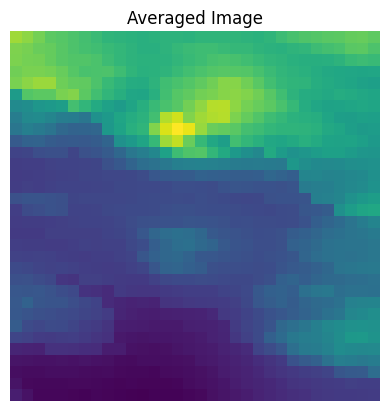

In [102]:
for images, labels in test_dataset.take(1):  # Take the first batch
    image = images[0].numpy()  # Get the first image from the batch and convert to numpy
    print(image.shape)
    # Average across the channels (assuming image shape is (H, W, 11))
    image_avg = image.mean(axis=-1)  # Average along the last axis (channels)

    # Check the shape of the averaged image (should be H, W)
    print("Averaged image shape:", image_avg.shape)

    # Plot the averaged image
    plt.imshow(image_avg, cmap='viridis')  # You can change the colormap if needed
    plt.title("Averaged Image")
    plt.axis('off')
    plt.show()

### Resnet

In [198]:
from tensorflow.keras.applications import ResNet50 # resnet mas pequeña para entrenar!!
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense

def create_resnet_cbna(input_shape, num_classes):
    # Crear una entrada con el número correcto de canales
    inputs = Input(shape=input_shape)

    # Modificar la primera capa convolucional para aceptar 11 canales en lugar de 3
    x = Conv2D(64, (7, 7), strides=(2, 2), padding="same", use_bias=False, name="custom_conv1")(inputs)

    # Cargar ResNet50 sin la primera capa y sin la capa de clasificación
    base_model = ResNet50(include_top=False, weights=None, input_tensor=x)  # Sin pesos preentrenados

    # Obtener las capas de ResNet después de la convolución inicial
    x = base_model.output

    # Agregar Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Capa densa para clasificación
    outputs = Dense(num_classes, activation='sigmoid')(x)

    # Crear el nuevo modelo
    model = Model(inputs, outputs)
    
    return model

# Definir forma de entrada y número de clases
input_shape = (32, 32, 11)  # Imágenes con 11 canales
num_classes = 5357

# Crear el modelo sin pesos preentrenados
model_resnet = create_resnet_cbna(input_shape, num_classes)

# Compilar el modelo
model_resnet.compile(optimizer='adam', loss=focal_loss(alpha=0.25, gamma=4.0), metrics=['accuracy'])

# Mostrar resumen del modelo
model_resnet.summary()


ImportError: cannot import name 'ResNet18' from 'tensorflow.keras.applications' (/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/_tf_keras/keras/applications/__init__.py)

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir callbacks (opcional)
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history_resnet = model_resnet.fit(
    train_dataset, 
    validation_data=val_dataset,
    epochs=50,  # Ajusta según necesidad
    batch_size=32,  # Ajusta según memoria disponible
#    callbacks=[early_stopping]
)




Epoch 1/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.0050 - loss: 0.0027 - val_accuracy: 3.3856e-04 - val_loss: 9.6395e-04
Epoch 2/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0067 - loss: 9.1310e-04 - val_accuracy: 5.6427e-04 - val_loss: 0.0030
Epoch 3/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0062 - loss: 7.7066e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.7553e-04
Epoch 4/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0055 - loss: 7.0856e-04 - val_accuracy: 0.0020 - val_loss: 9.3994e-04
Epoch 5/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0050 - loss: 7.1237e-04 - val_accuracy: 9.0283e-04 - val_loss: 7.8286e-04
Epoch 6/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0050 - loss: 6.6881e-04 - val_accuracy: 0.0015 - val_loss: 0.0025
Epoch 7/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0049 - loss: 6.8864e-04 - val_accuracy: 0.0019 - val_loss: 0.0015
Epoch 8/50
1293/1293

KeyboardInterrupt: 

In [100]:
# Evaluar el modelo en los datos de validación
loss, acc = model_resnet.evaluate(test_dataset)
print(f"Validación - Pérdida: {loss:.4f}, Precisión: {acc:.4f}")

277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0030 - loss: 9.5958e-04
Validación - Pérdida: 0.0009, Precisión: 0.0023


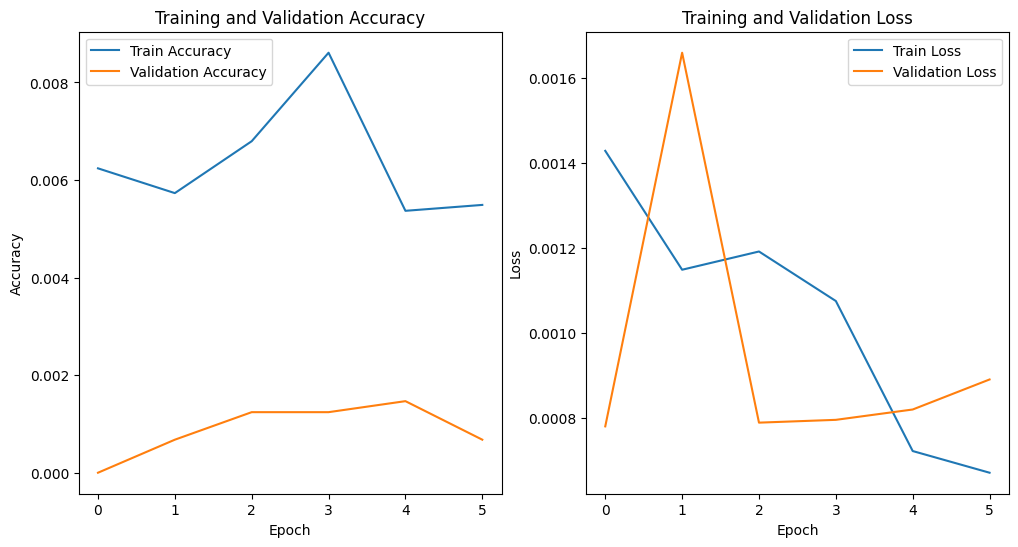

In [101]:
plot_acc_loss(history_resnet)

### ResNet18

In [199]:
"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
[2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers:
Surpassing human-level performance on imagenet classification. In
ICCV, 2015.
"""


from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="sigmoid") # "softmax"

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [206]:
resnet18 = ResNet18(5357)
resnet18.build(input_shape = (None,32,32,11))
#use categorical_crossentropy since the label is one-hot encoded
from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
resnet18.compile(optimizer = "adam",loss=focal_loss(), metrics=["accuracy"]) 
resnet18.summary()

/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'res_net18_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "res_net18_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_24 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_25 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_26 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_27 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_28 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_29 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_30 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_block_31 (ResnetBlock)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [208]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc",mode='min')
#I did not use cross validation, so the validate performance is not accurate.
history_resnet18 = resnet18.fit(train_dataset, epochs=50, validation_data=val_dataset,callbacks=[es])

Epoch 1/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0050 - loss: 0.0085 - val_accuracy: 0.0063 - val_loss: 0.0086
Epoch 2/50
  31/1293 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0023 - loss: 0.0095  

/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0066 - loss: 0.0083 - val_accuracy: 0.0160 - val_loss: 0.0085
Epoch 3/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0077 - loss: 0.0082 - val_accuracy: 0.0173 - val_loss: 0.0084
Epoch 4/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0094 - loss: 0.0081 - val_accuracy: 0.0166 - val_loss: 0.0083
Epoch 5/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0122 - loss: 0.0080 - val_accuracy: 0.0185 - val_loss: 0.0083
Epoch 6/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0131 - loss: 0.0080 - val_accuracy: 0.0223 - val_loss: 0.0083
Epoch 7/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0148 - loss: 0.0079 - val_accuracy: 0.0221 - val_loss: 0.0083
Epoch 8/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0145 - loss: 0.0078 - val_accuracy: 0.0190 - val_loss: 0.0083
Epoch 9/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0179 - loss: 0.0078 - val_accurac

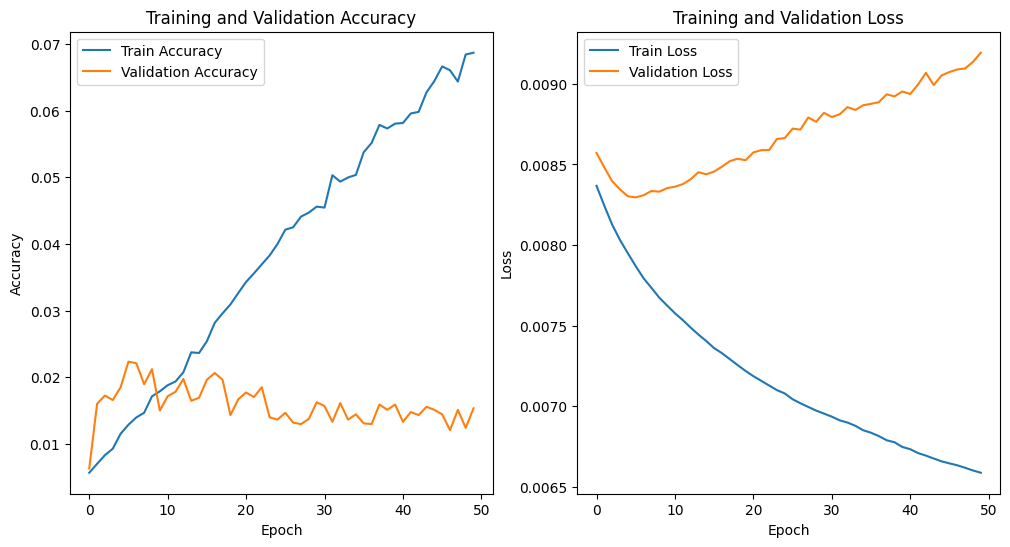

In [209]:
plot_acc_loss(history_resnet18)